# Control Cinemático
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/fundamentos-robotica-python/blob/main/6-Cinematica-Diferencial/6-2-Control-Cinematico.ipynb)

* Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC
* Fundamentos de Robótica

Este archivo contiene algunos ejemplos de control cinemático

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Funciones auxiliares**: Se utilizarán para graficar el robot RR

(Lo ideal sería que estuviesen en un archivo separado, pero por facilidad se están colocando aquí)

In [2]:
if 'google.colab' in str(get_ipython()):
    !wget https://raw.githubusercontent.com/oscar-ramos/fundamentos-robotica-python/main/6-Cinematica-Diferencial/utils.py

from utils import plot_robot2d

## Ejemplo de control cinemático

En este ejemplo se realizará el control cinemático del robot RR de la diapositiva 39. El robot se encuentra con una configuración inicial

$q=(0.5, 0.5)$

y se desea que el efector final termine en la posición 

$x_d=(1.2, 1.5)$.

Se asumirá que $l_1=l_2=1$.

In [3]:
def cdirecta(q, l1, l2):
    q1=q[0]; q2=q[1]
    x = l1*np.cos(q1) + l2*np.cos(q1+q2)
    y = l1*np.sin(q1) + l2*np.sin(q1+q2)
    return np.array([x, y])

def jacobiano(q, l1, l2):
    q1=q[0]; q2=q[1]
    J = np.array([[-l1*np.sin(q1)-l2*np.sin(q1+q2), -l2*np.sin(q1+q2)],
                  [l1*np.cos(q1)+l2*np.cos(q1+q2), l2*np.cos(q1+q2)]])
    return J

In [4]:
# Longitudes del robot
l1=1; l2=1

k = 1               # Constante de ganancia cinemática  
dt = 0.05           # Tiempo de control (cada cuánto se envía la señal al robot)
epsilon = 1e-3      # Máximo error admisible

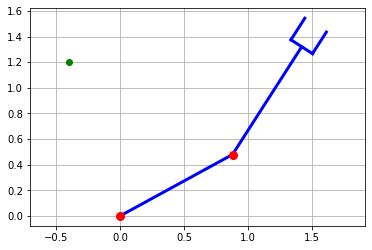

In [5]:
# Configuración articular inicial del robot
q = np.array([0.5, 0.5])

# Posición deseada del efector final
xd = np.array([-0.4, 1.2])

plot_robot2d(q, l1, l2, show_axis=False)
plt.plot(xd[0], xd[1], 'og')
plt.show()

In [6]:
# Listas para almacenar el error y el tiempo (para realizar los gráficos posteriores)
ee = []; xx = []; qq = []; tt = []; t=0

cnt = 1    # Contador
while(True):
    # Jacobiano para la configuración actual q
    J = jacobiano(q, l1, l2)
    # Cinemática directa dada la configuración actual q
    x = cdirecta(q, l1, l2)
    # Error en la posición
    e = x-xd

    # Almacenamiento de valores
    ee.append([e[0],e[1]])
    xx.append([x[0],x[1]])
    tt.append(t)
    qq.append([q[0],q[1]])

    # Verificación si se llegó al punto deseado
    if (np.linalg.norm(e)<epsilon):
        print("Se llegó al punto deseado en {:.3} segundos".format(cnt*dt))
        break
    
    # Derivada del error
    de = -k*e
    # Variación de la configuración articular
    dq = np.linalg.pinv(J).dot(de)
    # Integración para obtener la nueva configuración articular
    q = q + dt*dq
    # Actualizar el tiempo
    t = t + dt
    
    # Solamente para evitar un bucle infinito si algo sale mal
    cnt = cnt+1
    if (cnt > 1e5): 
        print("Se excedió el número de iteraciones")
        break

Se llegó al punto deseado en 7.4 segundos


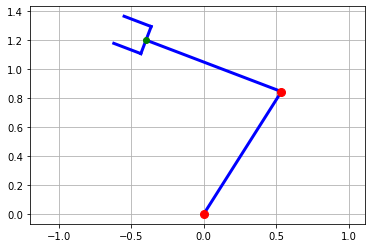

In [7]:
# Visualización de la configuración final del robot
plot_robot2d(q, l1, l2, show_axis=False)
plt.plot(xd[0], xd[1], 'og')
plt.show()

### *Error en el espacio cartesiano*

Se graficará la evolución temporal del error en el espacio cartesiano. Dado que se está utilizando control cinemático, se debe observar que el error tiende exponencialmente a cero, tanto en X como en Y.

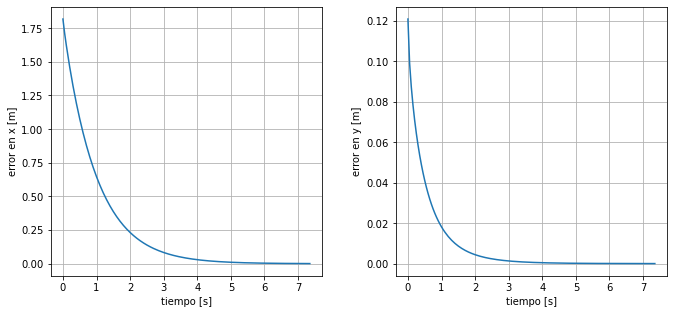

In [8]:
e = np.array(ee)

plt.figure(figsize=(10,5))
# Gráfico del error en x
plt.subplot(1,2,1)
plt.plot(np.array(tt),e[:,0])
plt.xlabel("tiempo [s]"); plt.ylabel("error en x [m]"); plt.grid()

# Gráfico del error en y
plt.subplot(1,2,2)
plt.plot(np.array(tt), e[:,1])
plt.xlabel("tiempo [s]"); plt.ylabel("error en y [m]"); plt.grid()
plt.tight_layout(pad=3.0) 

### *Trayectoria de x,y en función del tiempo*

Al igual que el error en el espacio cartesiano, la trayectoria de $x$ y de $y$ (coordenadas cartesianas) debe tener un comportamiento exponencial. Es decir, ambos deben tender exponencialmente hacia los valores deseados.

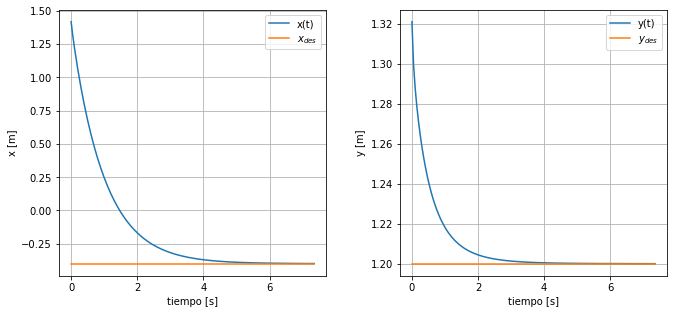

In [9]:
# Gráficos de la trayectoria (cartesiana) del efector final
x = np.array(xx)

plt.figure(figsize=(10,5))
# Gráfico de x
plt.subplot(1,2,1)
# Trayectoria de x
plt.plot(np.array(tt), x[:,0]) 
# Valor deseado para x
plt.plot(np.array(tt), xd[0]*np.ones(x.shape[0])) 
plt.xlabel("tiempo [s]"); plt.ylabel("x [m]"); plt.grid()
plt.legend(['x(t)','$x_{des}$'])

# Gráfico de y
plt.subplot(1,2,2)
# Trayectoria de y
plt.plot(np.array(tt), x[:,1])
# Valor deseado para y
plt.plot(np.array(tt), xd[1]*np.ones(x.shape[0]))
plt.xlabel("tiempo [s]"); plt.ylabel("y [m]"); plt.grid()
plt.tight_layout(pad=3.0) 
plt.legend(['y(t)','$y_{des}$'])

plt.show()

### *Trayectoria de las articulaciones*

Dado que el control cinemático se realiza en el espacio cartesiano (sobre el error de X y de Y), las únicas restricciones de comportamiento se dan en este espacio. No existen restricciones de comportamiento en el espacio articular, por lo que la evolución temporal de las articulaciones no tiene por qué seguir un comportamiento exponencial. 

En las siguientes figuras se observará que las articulaciones no siguen este comportamiento exponencial, en general.

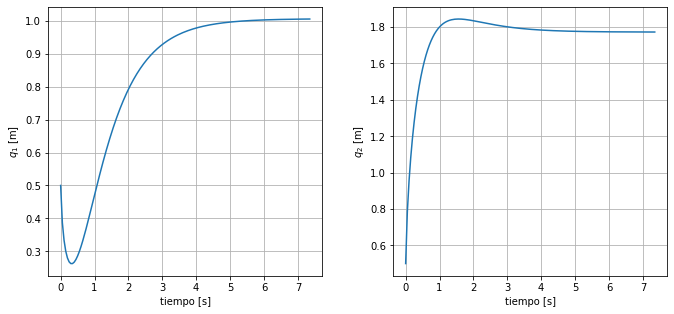

In [10]:
# Gráfico de la trayectoria de las articulaciones
q = np.array(qq)

plt.figure(figsize=(10,5))
# Gráfico de x
plt.subplot(1,2,1)
# Trayectoria de q1
plt.plot(np.array(tt), q[:,0]) 
plt.xlabel("tiempo [s]"); plt.ylabel("$q_1$ [m]"); plt.grid()

# Gráfico de q2
plt.subplot(1,2,2)
# Trayectoria de y
plt.plot(np.array(tt), q[:,1])
plt.xlabel("tiempo [s]"); plt.ylabel("$q_2$ [m]"); plt.grid()
plt.tight_layout(pad=3.0) 

### *Trayectoria cartesiana en el plano*

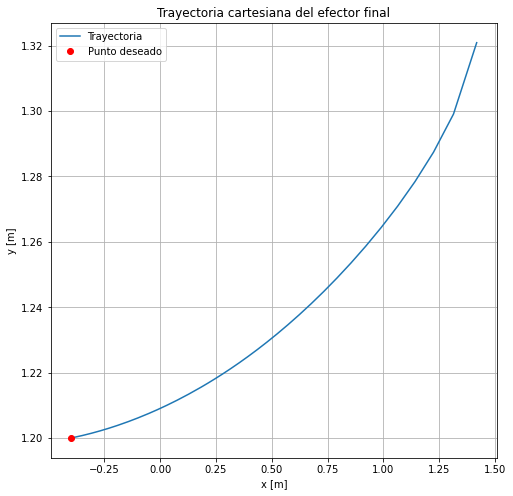

In [11]:
plt.figure(figsize=(8,8))

# Trayectoria en el plano del efector final
plt.plot(x[:,0], x[:,1])
# Punto deseado
plt.plot(xd[0], xd[1], 'or')

plt.legend(['Trayectoria','Punto deseado'])
plt.title("Trayectoria cartesiana del efector final")
plt.xlabel("x [m]"); plt.ylabel("y [m]")
plt.grid()

## Control cinemático y visualización del robot (modo local)

La siguiente visualización hace uso de "qt", por lo que únicamente funcionará en modo local. Para Google Colab utilizar la visualización de la siguiente sección.

In [12]:
%matplotlib qt

In [14]:
# Posición deseada
xd = np.array([-0.4, 1.2])
# Configuración articular inicial
q = np.array([0.5, 0.5])

cnt = 1    # Contador
while(True):
    # Jacobiano para la configuración actual q
    J = jacobiano(q, l1, l2)
    # Cinemática directa dada la configuración actual q
    x = cdirecta(q, l1, l2)
    # Error en la posición
    e = x-xd
    # Gráfico del robot
    plot_robot2d(q, l1, l2, show_axis=False)
    plt.plot(xd[0], xd[1], 'og')
    plt.pause(0.001)   

    # Verificación si se llegó al punto deseado
    if (np.linalg.norm(e)<epsilon):
        break
    
    # Derivada del error
    de = -k*e
    # Variación de la configuración articular
    dq = np.linalg.pinv(J).dot(de)
    # Integración para obtener la nueva configuración articular
    q = q + dt*dq
    
    # Solamente para evitar un bucle infinito si algo sale mal
    cnt = cnt+1
    if (cnt > 1e5): 
        print("Se excedió el número de iteraciones")
        break

## Control cinemático y visualización del robot (en Google Colab)

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install celluloid --quiet

In [ ]:
from IPython.display import HTML
from celluloid import Camera

In [ ]:
fig = plt.figure()              # También se puede escoger un tamaño más grande con: plt.figure(figsize=(5,4)) 
ax = fig.add_subplot(1, 1, 1)
camera = Camera(fig)

# Posición deseada
xd = np.array([-0.4, 1.2])
# Configuración articular inicial
q = np.array([0.5, 0.5])

cnt = 1    # Contador
while(True):
    # Jacobiano para la configuración actual q
    J = jacobiano(q, l1, l2)
    # Cinemática directa dada la configuración actual q
    x = cdirecta(q, l1, l2)
    # Error en la posición
    e = x-xd
    # Gráfico del robot
    plot_robot2d(q, l1, l2, ax, show_axis=False)
    plt.plot(xd[0], xd[1], 'og')
    camera.snap()

    # Verificación si se llegó al punto deseado
    if (np.linalg.norm(e)<epsilon):
        break
    
    # Derivada del error
    de = -k*e
    # Variación de la configuración articular
    dq = np.linalg.pinv(J).dot(de)
    # Integración para obtener la nueva configuración articular
    q = q + dt*dq
    
    # Solamente para evitar un bucle infinito si algo sale mal
    cnt = cnt+1
    if (cnt > 1e5): 
        print("Se excedió el número de iteraciones")
        break

plt.close()

In [ ]:
# Crear la animación
anim = camera.animate(interval = 40, repeat = True, repeat_delay = 500)

# Mostrar el resultado
HTML(anim.to_html5_video())